In [129]:
import numpy as np
import pandas as pd

In [130]:
data=pd.read_csv("Data/studentscores.csv")

In [131]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# analyse des Data

In [132]:

# analyse si il y a des valeurs manquantes

data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [133]:
# verifier la somme de valeur manquantes
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [134]:
# pour donner les informations generale

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [135]:
# pour verifier la valeur max d'une colonne
data["Hours"].max()


np.float64(9.2)

In [136]:
print(data["Hours"].max())

9.2


In [137]:
print("le score maximale est de: ",data["Scores"].max())

le score maximale est de:  95


In [138]:
print("le score maximale est de: ",data["Scores"].min())

le score maximale est de:  17


# 4Division des data

In [139]:
data.head(4)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [140]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [141]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [142]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [143]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# 4.1 separation des data

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state =40)

In [146]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("x_test shape",y_test.shape)

x_train shape (18, 1)
x_test shape (7, 1)
y_train shape (18,)
x_test shape (7,)


# 5 construire le model 

In [147]:
# importation de l'agorithme

In [148]:
from sklearn.linear_model import LinearRegression

In [149]:
model_linear = LinearRegression()

In [150]:
# entrainement du model

In [151]:
model_linear.fit(x_train,y_train)

LinearRegression()

In [152]:
LinearRegression()

LinearRegression()

In [153]:
# faire la prediction 

In [154]:
y_Score_predicts = model_linear.predict(x_test)

In [155]:
y_Score_predicts

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [156]:
y_test

array([95, 86, 17, 69, 42, 75, 54])

In [157]:
resultats = pd.DataFrame(y_test, y_Score_predicts)

In [158]:
resultats 

,0
90.348621,95
79.201258,86
11.303688,17
75.147672,69
33.598413,42
86.295034,75
48.799361,54


In [159]:
# evaluation du modele

from sklearn.metrics import mean_squared_error, r2_score

In [160]:
print("le MSE de la regression lineaire",mean_squared_error(y_test,  y_Score_predicts))

le MSE de la regression lineaire 51.90159659147337


In [161]:
print("le MSE de la regression lineaire",r2_score(y_test,  y_Score_predicts))

le MSE de la regression lineaire 0.9168569951293908


# 6 visualisation des resultats

In [162]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

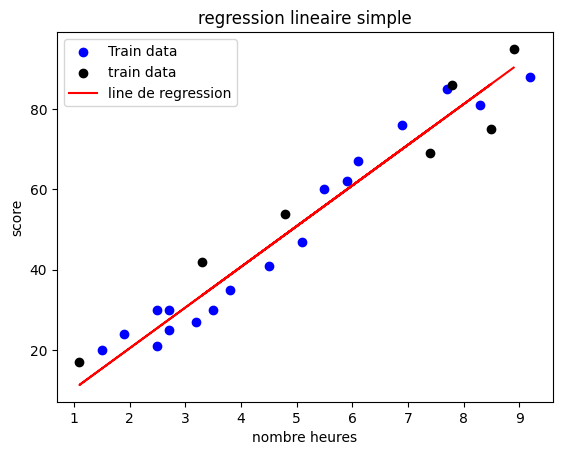

In [176]:
plt.scatter(x_train,y_train, color="blue",label="Train data")
plt.scatter(x_test,y_test, color="black",label="train data")

plt.plot(x_test, y_Score_predicts, color="red",label="ligne de  la regression")
plt.xlabel("nombre heures")
plt.ylabel("score")
plt.legend()
plt.title("regression lineaire simple")
plt.show

# prediction simple

In [166]:
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [180]:
resultats= pd.DataFrame({'y-score-reel' : y_test, 'y-scores-predits': y_Score_predicts, "difference":y_test-y_Score_predicts,})

In [181]:
resultats

,y-score-reel,y-scores-predits,difference
0,95,90.348621,4.651379
1,86,79.201258,6.798742
2,17,11.303688,5.696312
3,69,75.147672,-6.147672
4,42,33.598413,8.401587
5,75,86.295034,-11.295034
6,54,48.799361,5.200639


array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [179]:
print(model_linear.predict([[10]]))

[101.49598285]
